# "Segmentez des clients d'un site e-commerce"
_Cleaning Notebook_

## 0 Preliminaries

In [256]:
# !pip install flake8 pycodestyle_magic
# !pip install gtts

In [257]:
# !pip freeze > requirements_cleaning_eda.txt

Checking for PEP8 compliance

In [258]:
# %load_ext pycodestyle_magic
# %pycodestyle_on
# %pycodestyle_off

### 0.0 Importing Packages and Modules

Checking whether the notebook is on Colab or PC

In [259]:
import sys
is_colab = 'google.colab' in sys.modules
is_colab, sys.executable

(True, '/usr/bin/python3')

Mounting my Drive if on colab

In [260]:
if is_colab==True:
    from google.colab import files, output, drive
    drive.mount('/gdrive')
    %cd /gdrive
    print("You're on Google Colab")
else:
    print("You're on a PC")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive
You're on Google Colab


Installations and importations required in the virtual environment.

In [261]:
import os
if is_colab==True:
    if os.getcwd()!='/gdrive/My Drive/--DATA SCIENCE/PROJET5/NOTEBOOKS':
        os.chdir('My Drive/--DATA SCIENCE/PROJET5/NOTEBOOKS')
else:
    if not (os.path.exists(os.getcwd()+'/requirements_cleaning_eda.txt') \
                     and os.path.exists(os.getcwd()+'/P5_functions.py')):
        print("ERROR: Make sure 'P5_functions.py' and 'requirements_cleaning_eda.txt' are in the current working directory")

!pip install -r requirements_cleaning_eda.txt
from P5_functions import *

Importation of modules and packages. 

In [262]:
import io

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor']='w'

# import warnings
# warnings.filterwarnings('ignore')

import missingno as msno
# import ppscore as pps

import dill

Setting pandas display options

In [263]:
dictPdSettings = {'display.max_rows': 500, 'display.width': 100,
                    'display.max_colwidth': 100,
                    'display.float_format': lambda x: '%.2f' % x}
for k,v in dictPdSettings.items():
  pd.set_option(k,v)

To play audio text-to-speech during execution.

In [264]:
from IPython.display import Audio
from gtts import gTTS

def speak(text, lang='en'):
    with io.BytesIO() as f:
        gTTS(text=text, lang=lang).write_to_fp(f)
        f.seek(0)
        return Audio(f.read(), autoplay=True)

In [265]:
speak('Packages and modules successfully imported')

### 0.1 Importing the dataset

Data is composed of 9 distinct .csv files, that we'll load in a dictionnary of dataframes.

In [266]:
paths = {'cust': '../DATA/olist_customers_dataset.csv' ,
         'geoloc':  '../DATA/olist_geolocation_dataset.csv' ,
         'ord_it':  '../DATA/olist_order_items_dataset.csv' ,
         'ord_pay':  '../DATA/olist_order_payments_dataset.csv' ,
         'ord_rev':  '../DATA/olist_order_reviews_dataset.csv' ,
         'orders':  '../DATA/olist_orders_dataset.csv' ,
         'prod':  '../DATA/olist_products_dataset.csv' ,
         'sell':  '../DATA/olist_sellers_dataset.csv' ,
         'transl':  '../DATA/product_category_name_translation.csv' }

if is_colab==True:
    # Importing database from my Drive
    print("Try to import data files in the notebook from myDrive...")
else:
    # Importing database from PC
    print("Try to import data files in the notebook from PC ('DATA')...")

for k,v in paths.items():
    dfs = {k: pd.read_csv(v, sep=',',  encoding ='utf-8') for k,v in paths.items()}

print("-----> Importation of .csv in the notebook: OK")

Try to import data files in the notebook from myDrive...
-----> Importation of .csv in the notebook: OK


All the dates in the dataframes are to be converted in datetime.

In [267]:
for name_df in dfs.keys():
    date_cols = list(dfs[name_df]\
                     .columns[dfs[name_df].columns.str.contains('date|_at|time', regex=True)])
    print("----Dates columns in df['{}']: ".format(name_df), date_cols)
    dfs[name_df][date_cols] = dfs[name_df][date_cols].apply(pd.to_datetime)
    # print(dfs[name_df].columns)

----Dates columns in df['cust']:  []
----Dates columns in df['geoloc']:  []
----Dates columns in df['ord_it']:  ['shipping_limit_date']
----Dates columns in df['ord_pay']:  []
----Dates columns in df['ord_rev']:  ['review_creation_date', 'review_answer_timestamp']
----Dates columns in df['orders']:  ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
----Dates columns in df['prod']:  []
----Dates columns in df['sell']:  []
----Dates columns in df['transl']:  []


In [268]:
speak('Datasets successfully imported')

### 0.2 First Overview

#### General description

In [269]:
for k,v in dfs.items():
    print(f'___________________{k.upper()}___________________')
    display(v.describe(include='all'))

___________________CUST___________________


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.00,99441,99441
unique,99441,96096,nan,4119,27
top,072d5af6d1c25d24d84182a5c1ce6451,8d50f5eadf50201ccdcedfb9e2ac8455,nan,sao paulo,SP
freq,1,17,nan,15540,41746
mean,NaN,NaN,35137.47,NaN,NaN
std,NaN,NaN,29797.94,NaN,NaN
min,NaN,NaN,1003.00,NaN,NaN
25%,NaN,NaN,11347.00,NaN,NaN
50%,NaN,NaN,24416.00,NaN,NaN
75%,NaN,NaN,58900.00,NaN,NaN


___________________GEOLOC___________________


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1000163.00,1000163.00,1000163.00,1000163,1000163
unique,nan,nan,nan,8011,27
top,nan,nan,nan,sao paulo,SP
freq,nan,nan,nan,135800,404268
mean,36574.17,-21.18,-46.39,NaN,NaN
std,30549.34,5.72,4.27,NaN,NaN
min,1001.00,-36.61,-101.47,NaN,NaN
25%,11075.00,-23.60,-48.57,NaN,NaN
50%,26530.00,-22.92,-46.64,NaN,NaN
75%,63504.00,-19.98,-43.77,NaN,NaN


___________________ORD_IT___________________


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.00,112650,112650,112650,112650.00,112650.00
unique,98666,nan,32951,3095,93318,nan,nan
top,8272b63d03f5f79c56e9e4120aec44ef,nan,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,nan,nan
freq,21,nan,527,2033,21,nan,nan
first,NaN,nan,NaN,NaN,2016-09-19 00:15:34,nan,nan
last,NaN,nan,NaN,NaN,2020-04-09 22:35:08,nan,nan
mean,NaN,1.20,NaN,NaN,NaN,120.65,19.99
std,NaN,0.71,NaN,NaN,NaN,183.63,15.81
min,NaN,1.00,NaN,NaN,NaN,0.85,0.00
25%,NaN,1.00,NaN,NaN,NaN,39.90,13.08


___________________ORD_PAY___________________


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.00,103886,103886.00,103886.00
unique,99440,nan,5,nan,nan
top,fa65dad1b0e818e3ccc5cb0e39231352,nan,credit_card,nan,nan
freq,29,nan,76795,nan,nan
mean,NaN,1.09,NaN,2.85,154.10
std,NaN,0.71,NaN,2.69,217.49
min,NaN,1.00,NaN,0.00,0.00
25%,NaN,1.00,NaN,1.00,56.79
50%,NaN,1.00,NaN,1.00,100.00
75%,NaN,1.00,NaN,4.00,171.84


___________________ORD_REV___________________


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,100000,100000,100000.00,11715,41753,100000,100000
unique,99173,99441,nan,4600,36921,637,99010
top,f4bb9d6dd4fb6dcc2298f0e7b17b8e1e,8e17072ec97ce29f0e1f111e598b0c85,nan,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,nan,426,230,466,4
first,NaN,NaN,nan,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
last,NaN,NaN,nan,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35
mean,NaN,NaN,4.07,NaN,NaN,NaN,NaN
std,NaN,NaN,1.36,NaN,NaN,NaN,NaN
min,NaN,NaN,1.00,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.00,NaN,NaN,NaN,NaN


___________________ORDERS___________________


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,29152a6bbb878d0f03d10e9ee8f59093,a28d84b0258584bfe43bfe94bd30b657,delivered,2018-03-31 15:08:21,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


___________________PROD___________________


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.00,32341.00,32341.00,32949.00,32949.00,32949.00,32949.00
unique,32951,73,nan,nan,nan,nan,nan,nan,nan
top,6086d4e24d4dd50521452e49bde06628,cama_mesa_banho,nan,nan,nan,nan,nan,nan,nan
freq,1,3029,nan,nan,nan,nan,nan,nan,nan
mean,NaN,NaN,48.48,771.50,2.19,2276.47,30.82,16.94,23.20
std,NaN,NaN,10.25,635.12,1.74,4282.04,16.91,13.64,12.08
min,NaN,NaN,5.00,4.00,1.00,0.00,7.00,2.00,6.00
25%,NaN,NaN,42.00,339.00,1.00,300.00,18.00,8.00,15.00
50%,NaN,NaN,51.00,595.00,1.00,700.00,25.00,13.00,20.00
75%,NaN,NaN,57.00,972.00,3.00,1900.00,38.00,21.00,30.00


___________________SELL___________________


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.00,3095,3095
unique,3095,nan,611,23
top,81a1104df0f08b59c68aa5b03cfe398e,nan,sao paulo,SP
freq,1,nan,694,1849
mean,NaN,32291.06,NaN,NaN
std,NaN,32713.45,NaN,NaN
min,NaN,1001.00,NaN,NaN
25%,NaN,7093.50,NaN,NaN
50%,NaN,14940.00,NaN,NaN
75%,NaN,64552.50,NaN,NaN


___________________TRANSL___________________


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,flores,air_conditioning
freq,1,1


Printing total nb and percentage of null

In [270]:
for k,v in dfs.items():
    print(f'___________________{k.upper()}___________________')
    display(print_null_pct(v))

___________________CUST___________________
nb of null:  0 
pct of null:  0.0


None

___________________GEOLOC___________________
nb of null:  0 
pct of null:  0.0


None

___________________ORD_IT___________________
nb of null:  0 
pct of null:  0.0


None

___________________ORD_PAY___________________
nb of null:  0 
pct of null:  0.0


None

___________________ORD_REV___________________
nb of null:  146532 
pct of null:  20.9


None

___________________ORDERS___________________
nb of null:  4908 
pct of null:  0.6


None

___________________PROD___________________
nb of null:  2448 
pct of null:  0.8


None

___________________SELL___________________
nb of null:  0 
pct of null:  0.0


None

___________________TRANSL___________________
nb of null:  0 
pct of null:  0.0


None

### 0.3 Merging and aggregating the 'order' databases

#### Geolocation

In [271]:
dfs['geoloc'].columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city',
       'geolocation_state'],
      dtype='object')

The geolocation dataset provides the city, state, latitude and longitude corresponding to Brazil zipcodes.

We notice that these data could be used to calculate the geographical distance between sellers and vendor. However we won't use this distance in our segmentation of clients, so we won't use the Geolocation dataset.

In [272]:
print("States in Brazil (Geolocation dataset) ({}):\n{}".format(dfs['geoloc'].geolocation_state.nunique(), dfs['geoloc'].geolocation_state.unique()))
print("Cities in Brazil (Geolocation dataset): {}".format(dfs['geoloc'].geolocation_city.nunique()))
print("ZipCodes in Brazil (Geolocation dataset): {}".format(dfs['geoloc'].geolocation_zip_code_prefix.nunique()))

States in Brazil (Geolocation dataset) (27):
['SP' 'RN' 'AC' 'RJ' 'ES' 'MG' 'BA' 'SE' 'PE' 'AL' 'PB' 'CE' 'PI' 'MA'
 'PA' 'AP' 'AM' 'RR' 'DF' 'GO' 'RO' 'TO' 'MT' 'MS' 'RS' 'PR' 'SC']
Cities in Brazil (Geolocation dataset): 8011
ZipCodes in Brazil (Geolocation dataset): 19015


#### Sellers

In [273]:
dfs['sell'].columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

The Sellers dataset gives information about their localisation.
Three levels of precision are given : 
- zipcode
- city
- state

In [274]:
print("Unique seller: ", dfs['sell'].seller_id.nunique())
print("Shape of sellers dataset: ", dfs['sell'].shape)

Unique seller:  3095
Shape of sellers dataset:  (3095, 4)


In [275]:
print("States of sellers (Sellers dataset) ({}):\n{}".format(dfs['sell'].seller_state.nunique(), dfs['sell'].seller_state.unique()))
print("Cities of sellers (Sellers dataset): {}".format(dfs['sell'].seller_city.nunique()))
print("Zipcodes of sellers (Sellers dataset): {}".format(dfs['sell'].seller_zip_code_prefix.nunique()))

States of sellers (Sellers dataset) (23):
['SP' 'RJ' 'PE' 'PR' 'GO' 'SC' 'BA' 'DF' 'RS' 'MG' 'RN' 'MT' 'CE' 'PB'
 'AC' 'ES' 'RO' 'PI' 'MS' 'SE' 'MA' 'AM' 'PA']
Cities of sellers (Sellers dataset): 611
Zipcodes of sellers (Sellers dataset): 2246


#### Categories

Products are classified in categories. A translation file is provided in order to get the english names of product categories.

In [276]:
dfs['transl'].columns, dfs['transl'].shape, dfs['transl'].nunique()

(Index(['product_category_name', 'product_category_name_english'], dtype='object'),
 (71, 2),
 product_category_name            71
 product_category_name_english    71
 dtype: int64)

Let's have a look to the 71 categories:

In [277]:
dfs['transl'].iloc[:,1].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

In [278]:
# Adding lines for missing translations ('unknown', 'unknown'),
#('beleza_saude', 'health_beauty'), ('pc_gamer', 'pc_gamer'),
#('portateis_cozinha_e_preparadores_de_alimentos', 'cooking tools')
#'beleza_saude', 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'

cols = dfs['transl'].columns
df_app = \
    pd.DataFrame({'product_category_name': ['beleza_saude', 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos', 'unknown'],
                  'product_category_name_english': ['health_beauty', 'pc_gamer', 'kitchen_utensils', 'unknown']})
dfs['transl'] = dfs['transl'].append(df_app, ignore_index=True)

These categories can be splitted into only 13 categories. We will allow categories to belong to 2 or more bigger categories at the same time.

In order to prepare the aggreagation of the order_item dataset, each category is represented as a column.

In [279]:
# Dictionary of the keywords in categories related to bigger categories
big_cat_dict = {
                'cat_electronics' : ['telephony', 'watches', 'consoles', 'computer',
                                     'tablets', 'appliance', 'electronics'],
                'cat_furniture' : ['furniture', 'table', 'bed'],
                'cat_food' : ['food', 'drink', 'cuisine'],
                'cat_home' : ['home', 'house', 'kitchen', 'flowers', 'bed',
                              'decor', 'conditioning', 'party', 'christmas', 'luggage'],
                'cat_diy' : ['struction', 'tools', 'craft'],
                'cat_fashion' : ['fash'],
                'cat_leisure' : ['garden', 'toys', 'game', 'cool', 'games', 'art',
                                 'sports', 'music', 'cine', 'beach', 'pc'],
                'cat_multimedia' : ['dvd', 'audio'],
                'cat_books' : ['books'],
                'cat_hygiene' : ['health', 'perfumery', 'baby', 'hygiene' ],
                'cat_office' : ['office', 'stationery', 'business'],
                'cat_miscellaneous' :  ['appliances', 'security', 'auto', 'pet',
                                        'market', 'industry'],
                'cat_unknown': ['unknown']
                }

# Create new dummy columns for bigger categories
for big_cat, li_words in big_cat_dict.items():
    dfs['transl'][big_cat] = dfs['transl'].iloc[:,1]\
        .str.contains('|'.join(li_words), regex=True).map({False: 0, True: 1})

dfs['transl'].sample(5)

,product_category_name,product_category_name_english,cat_electronics,cat_furniture,cat_food,cat_home,cat_diy,cat_fashion,cat_leisure,cat_multimedia,cat_books,cat_hygiene,cat_office,cat_miscellaneous,cat_unknown
29,pet_shop,pet_shop,0,0,0,0,0,0,0,0,0,0,0,1,0
22,cool_stuff,cool_stuff,0,0,0,0,0,0,1,0,0,0,0,0,0
74,unknown,unknown,0,0,0,0,0,0,0,0,0,0,0,0,1
30,moveis_escritorio,office_furniture,0,1,0,0,0,0,0,0,0,0,1,0,0
61,musica,music,0,0,0,0,0,0,1,0,0,0,0,0,0


#### Products / Items

In [280]:
dfs['prod'].columns

Index(['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm'],
      dtype='object')

Let's see if there are missing data.

In [281]:
dfs['prod'].isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

We'll fill missing values in product_category_name with 'unknown', and product_description_length' with 0.

In [282]:
dfs['prod'] = dfs['prod'].fillna(value ={'product_category_name': 'unknown',
                                         'product_description_lenght': 0})

In [283]:
dfs['prod'].isna().sum()

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght      0
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

We'll use the translation file (as a dictionary) to get the english names of categories and creates the bigger categories columns.

In [284]:
cat_dict = dfs['transl'].set_index('product_category_name')\
    .to_dict()['product_category_name_english']

In [285]:
dfs['prod'].product_category_name = \
    dfs['prod'].product_category_name.map(cat_dict)

In [286]:
dfs['prod'].product_category_name.unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'unknown', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
     

In [287]:
for big_cat, li_words in big_cat_dict.items():
    dfs['prod'][big_cat] = dfs['prod'].product_category_name\
        .str.contains('|'.join(li_words), regex=True).map({False: 0, True: 1})

The only column that will be useful for us is the categories of the item and the description length. We drop all the other columns. 

In [288]:
dfs['prod'].columns

Index(['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'cat_electronics', 'cat_furniture', 'cat_food', 'cat_home', 'cat_diy',
       'cat_fashion', 'cat_leisure', 'cat_multimedia', 'cat_books', 'cat_hygiene', 'cat_office',
       'cat_miscellaneous', 'cat_unknown'],
      dtype='object')

In [289]:
dfs['prod'] = dfs['prod'].drop(columns=['product_name_lenght',
                                        'product_photos_qty',
                                        'product_weight_g',
                                        'product_length_cm',
                                        'product_height_cm',
                                        'product_width_cm'])

In [290]:
dfs['prod'].isna().sum()

product_id                    0
product_category_name         0
product_description_lenght    0
cat_electronics               0
cat_furniture                 0
cat_food                      0
cat_home                      0
cat_diy                       0
cat_fashion                   0
cat_leisure                   0
cat_multimedia                0
cat_books                     0
cat_hygiene                   0
cat_office                    0
cat_miscellaneous             0
cat_unknown                   0
dtype: int64

In [291]:
dfs['prod'].head()

,product_id,product_category_name,product_description_lenght,cat_electronics,cat_furniture,cat_food,cat_home,cat_diy,cat_fashion,cat_leisure,cat_multimedia,cat_books,cat_hygiene,cat_office,cat_miscellaneous,cat_unknown
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,287.00,0,0,0,0,0,0,0,0,0,1,0,0,0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,276.00,0,0,0,0,0,0,1,0,0,0,0,0,0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,250.00,0,0,0,0,0,0,1,0,0,0,0,0,0
3,cef67bcfe19066a932b7673e239eb23d,baby,261.00,0,0,0,0,0,0,0,0,0,1,0,0,0
4,9dc1a7de274444849c219cff195d0b71,housewares,402.00,0,0,0,1,0,0,0,0,0,0,0,0,0


#### Order items

In [292]:
dfs['ord_it'].columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value'],
      dtype='object')

In [293]:
dfs['orders'].columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

We are not interested in the sellers id. We drop the column.

In [294]:
dfs['ord_it'] = dfs['ord_it'].drop(columns=['seller_id'])

Let's merge the product database with the orders database.
We'll join on the 'product_id' column on the left (dfs['ord_it']) and on the right (dfs['prod']).

In [295]:
dfs['ord_it'] = pd.merge(dfs['ord_it'], dfs['prod'], on='product_id')
print("Available columns in 'order_items' dataset", dfs['ord_it'].columns)

Available columns in 'order_items' dataset Index(['order_id', 'order_item_id', 'product_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_description_lenght', 'cat_electronics', 'cat_furniture',
       'cat_food', 'cat_home', 'cat_diy', 'cat_fashion', 'cat_leisure', 'cat_multimedia',
       'cat_books', 'cat_hygiene', 'cat_office', 'cat_miscellaneous', 'cat_unknown'],
      dtype='object')


In [296]:
dfs['ord_it'].head()

,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_description_lenght,cat_electronics,cat_furniture,cat_food,cat_home,cat_diy,cat_fashion,cat_leisure,cat_multimedia,cat_books,cat_hygiene,cat_office,cat_miscellaneous,cat_unknown
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.90,13.29,cool_stuff,598.00,0,0,0,0,0,0,1,0,0,0,0,0,0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,2017-07-05 02:44:11,55.90,17.96,cool_stuff,598.00,0,0,0,0,0,0,1,0,0,0,0,0,0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,2018-05-23 10:56:25,64.90,18.33,cool_stuff,598.00,0,0,0,0,0,0,1,0,0,0,0,0,0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,2017-08-07 18:55:08,58.90,16.17,cool_stuff,598.00,0,0,0,0,0,0,1,0,0,0,0,0,0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,2017-08-16 22:05:11,58.90,13.29,cool_stuff,598.00,0,0,0,0,0,0,1,0,0,0,0,0,0


We have a dataset that gives for each line each product bought, and the order in which it has been bought.

In [297]:
print("Total number of products bought: ",dfs['ord_it'].shape[0])
print("Total number of distinct orders: ",dfs['ord_it'].order_id.nunique())

Total number of products bought:  112650
Total number of distinct orders:  98666


Each order may contain one or several items.

Let's have a look on the orders composed of multiple items:

In [298]:
dfs['ord_it'][dfs['ord_it'].duplicated('order_id', keep=False)]\
    .sort_values(['order_id', 'order_item_id']).iloc[159:166]

,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_description_lenght,cat_electronics,cat_furniture,cat_food,cat_home,cat_diy,cat_fashion,cat_leisure,cat_multimedia,cat_books,cat_hygiene,cat_office,cat_miscellaneous,cat_unknown
16057,01b06b4d63c340902dbe3d9f8b2fe821,1,a659cb33082b851fb87a33af8f0fff29,2018-06-12 11:54:52,84.90,13.03,auto,380.00,0,0,0,0,0,0,0,0,0,0,0,1,0
16058,01b06b4d63c340902dbe3d9f8b2fe821,2,a659cb33082b851fb87a33af8f0fff29,2018-06-12 11:54:52,84.90,13.03,auto,380.00,0,0,0,0,0,0,0,0,0,0,0,1,0
16087,01b1a7fdae9ad1837d6ab861705a1fa5,1,3fae92f8d0ebb3317991934a6d717c47,2017-06-02 16:02:58,49.99,16.17,bed_bath_table,306.00,0,1,0,1,0,0,0,0,0,0,0,0,0
16089,01b1a7fdae9ad1837d6ab861705a1fa5,2,9b02b650be0a39d8590be7d35be443f9,2017-06-02 16:02:58,59.00,10.68,housewares,660.00,0,0,0,1,0,0,0,0,0,0,0,0,0
16201,01ba82170ebb683c73793bb809bbf1b9,1,d6fe3b4ddecd4a8393c6a1385de3bfb6,2018-02-20 15:11:35,192.97,33.59,office_furniture,1157.00,0,1,0,0,0,0,0,0,0,0,1,0,0
16202,01ba82170ebb683c73793bb809bbf1b9,2,d6fe3b4ddecd4a8393c6a1385de3bfb6,2018-02-20 15:11:35,192.97,33.59,office_furniture,1157.00,0,1,0,0,0,0,0,0,0,0,1,0,0
16203,01ba82170ebb683c73793bb809bbf1b9,3,d6fe3b4ddecd4a8393c6a1385de3bfb6,2018-02-20 15:11:35,192.97,33.59,office_furniture,1157.00,0,1,0,0,0,0,0,0,0,0,1,0,0


Most of the multi-items orders are composed of the same items (see idexes 16057 and 16508), but it is sometimes not the case (16087 and 16089).

Let's aggregate all the lines of dfs['ord_it'] correponding to the same order to get a dataframe with one line per order.
For each group of line with the same 'order_id', we'll:
- take max of 'order_item_id' (to have the total number of items in the order)
- take the mean of the product_description_length
- take sum of the number of one_hot columns that indicate the category
- take sum of price and sum of freight_value
- take the max of shipping_limit_date (to have the last date at which all items are supposedly received)
- take the most frequent category of the order

Then we'll drop the 'product_id' column.

In [299]:
dfs['ord_it'].columns

Index(['order_id', 'order_item_id', 'product_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_description_lenght', 'cat_electronics', 'cat_furniture',
       'cat_food', 'cat_home', 'cat_diy', 'cat_fashion', 'cat_leisure', 'cat_multimedia',
       'cat_books', 'cat_hygiene', 'cat_office', 'cat_miscellaneous', 'cat_unknown'],
      dtype='object')

In [300]:
def most_freq_cat(x): return x if x.size == 1 else x.value_counts().idxmax()

agg_dict_1 = {'order_item_id': np.max,
              'shipping_limit_date': np.max,
              'price': np.sum, 'freight_value': np.sum,
              'product_description_lenght': np.mean,
              'product_category_name': most_freq_cat}

cat_cols = dfs['ord_it'].columns[dfs['ord_it'].columns.str.contains('cat_')]
agg_dict_2 = {c: np.sum for c in cat_cols}

# Concatenate the dictionaries
agg_dict = dict(set(agg_dict_1.items()) | set(agg_dict_2.items())) 

In [301]:
# Aggregate the lines of each order
dfs['ord_it'] = dfs['ord_it'].groupby('order_id').agg(agg_dict).reset_index()

# Move the order of the columns (put categories at the end)
dfs['ord_it'] = dfs['ord_it'][move_cat_containing(dfs['ord_it'].columns,
                                                  ['cat_'], 'last')]

# Change the name the 'order_item_id' column
dfs['ord_it'] = dfs['ord_it']\
    .rename(columns={"order_item_id": "order_item_nb",
                     "product_description_lenght": "mean_prod_descr_length",
                    "shipping_limit_date": "max_limit_ship_date",
                     "product_category_name": 'main_prod_categ'})

In [302]:
dfs['ord_it'].head()

,order_id,price,main_prod_categ,freight_value,order_item_nb,max_limit_ship_date,mean_prod_descr_length,cat_office,cat_unknown,cat_fashion,cat_furniture,cat_hygiene,cat_home,cat_leisure,cat_diy,cat_multimedia,cat_food,cat_electronics,cat_books,cat_miscellaneous
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,cool_stuff,13.29,1,2017-09-19 09:45:35,598.00,0,0,0,0,0,0,1,0,0,0,0,0,0
1,00018f77f2f0320c557190d7a144bdd3,239.90,pet_shop,19.93,1,2017-05-03 11:05:13,239.00,0,0,0,0,0,0,0,0,0,0,0,0,1
2,000229ec398224ef6ca0657da4fc703e,199.00,furniture_decor,17.87,1,2018-01-18 14:48:30,695.00,0,0,0,1,0,1,0,0,0,0,0,0,0
3,00024acbcdf0a6daa1e931b038114c75,12.99,perfumery,12.79,1,2018-08-15 10:10:18,480.00,0,0,0,0,1,0,0,0,0,0,0,0,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,garden_tools,18.14,1,2017-02-13 13:57:51,409.00,0,0,0,0,0,0,1,1,0,0,0,0,0


In [303]:
print("Number of lines in dfs['ord_it']: ", dfs['ord_it'].shape[0])
print("Number of distinct orders: ", dfs['ord_it']['order_id'].nunique())
print("Total number of items sold: ", dfs['ord_it']['order_item_nb'].sum())

Number of lines in dfs['ord_it']:  98666
Number of distinct orders:  98666
Total number of items sold:  112650


#### Order payments

In [304]:
dfs['ord_pay'].columns

Index(['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value'], dtype='object')

In [305]:
print("Number of unique orders", dfs['ord_pay'].order_id.nunique())
print("Total number of lines (payments)" , dfs['ord_pay'].shape)

Number of unique orders 99440
Total number of lines (payments) (103886, 5)


In [306]:
print("Payment types are: ", dfs['ord_pay'].payment_type.unique())

Payment types are:  ['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']


Payments can be divided into 5 types :
'credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'

However some payments (same 'order_id') can be made by 2 different means. The number of payments made for each mean is filled in 'payment_sequential'.
NB: 'payment_sequential' is not the same as 'payment_installments', as the latter refers to a scheduling of payments over time.

We'll set a column for each 'payment_type' and we'll fill these columns with the corresponding 'payment_sequential' value. Then we'll aggregate (sum) the lines with the same 'order_id' in order to get one line per order.

In [307]:
dfs['ord_pay'].columns

Index(['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value'], dtype='object')

In [308]:
# Create dummy columns for payment_type
pay_type_df = pd.get_dummies(dfs['ord_pay']['payment_type'],
                             prefix='paytype')\
                                .mul(dfs['ord_pay']['payment_sequential'],
                                     axis=0)
dfs['ord_pay'] = pd.concat([dfs['ord_pay'], pay_type_df], axis=1)

# Aggregate paytypes columns
paytype_cols = ['paytype_boleto', 'paytype_credit_card','paytype_debit_card',
               'paytype_not_defined', 'paytype_voucher','payment_installments',
               'payment_value']
df1 = dfs['ord_pay'].groupby('order_id')[paytype_cols].agg(np.sum)

# Aggregate paytype in a cumulated paytype column
def cumul_paytype(x): return ''.join([s[0].upper() for s in sorted(x.unique())])
df2 = dfs['ord_pay'].groupby('order_id')['payment_type'].agg(cumul_paytype)\
    .reset_index().rename(columns={'payment_type': 'cum_paytype'})

# Merge the two aggregated dataframes
dfs['ord_pay'] = pd.merge(df2, df1, on='order_id')
dfs['ord_pay'].sample(6)

,order_id,cum_paytype,paytype_boleto,paytype_credit_card,paytype_debit_card,paytype_not_defined,paytype_voucher,payment_installments,payment_value
12657,20a1b5b821806e87157587550af9d52e,C,0,1,0,0,0,8,109.92
99222,ff64e0ba4800eb1127ac32aeac2b51f9,C,0,1,0,0,0,7,148.47
22791,3aaee056441dcae251f360b1c71a7279,C,0,1,0,0,0,1,135.35
94854,f42afa7297d7d5f4c540fd31c4196821,C,0,1,0,0,0,3,286.56
25907,42d823440aaa97195dc6f367332376f9,C,0,1,0,0,0,2,45.69
58649,97df9530497023b31dd0654f5908e41b,C,0,1,0,0,0,1,98.62


In [309]:
print("Total number of lines (payments) after aggregation" , dfs['ord_pay'].shape, dfs['ord_pay'].shape)

Total number of lines (payments) after aggregation (99440, 9) (99440, 9)


#### Order reviews

In [310]:
dfs['ord_rev'].columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

We'll then drop all the reviews with same 'review_id' and same 'review_creation_date' (duplicates).

In [311]:
ind_drop = dfs['ord_rev'][dfs['ord_rev'][['review_id',
                                          'review_creation_date']]\
                          .duplicated(keep='first')].index
print("nb of lines to drop: ", ind_drop.shape)
dfs['ord_rev'] = dfs['ord_rev'].drop(index=ind_drop)

nb of lines to drop:  (827,)


Let's create a column that give the length of the message.

In [312]:
dfs['ord_rev']['review_comment_length'] = \
    dfs['ord_rev']['review_comment_message'].str.len()

Now we can drop the columns we won't use.

In [313]:
dfs['ord_rev'] = dfs['ord_rev'].drop(columns=['review_answer_timestamp',
                                              'review_comment_title',
                                              'review_creation_date',
                                              'review_comment_message'])

In [314]:
print("Number of orders: ", dfs['ord_rev'].shape)
print("Number of unique orders: ", dfs['ord_rev']['order_id'].nunique())

Number of orders:  (99173, 4)
Number of unique orders:  98926


Some orders have different items. Each item may have a different comment and review:

In [315]:
dfs['ord_rev'][dfs['ord_rev'].duplicated('order_id', keep=False)]\
                             .sort_values('order_id').head(7)

,review_id,order_id,review_score,review_comment_length
17975,2eab0b2e6f5bded4d9b0b2afcfdf4534,02e0b68852217f5715fb9cc885829454,4,23.00
36081,fa493ead9b093fb0fa6f7d4905b0ef3b,02e0b68852217f5715fb9cc885829454,4,27.00
38672,1dee9d450a2b8533d2085cef898ca4a2,03515a836bb855b03f7df9dee520a8fc,5,nan
50019,5e1ee2e924a1dd10d80b99555383c0a7,03515a836bb855b03f7df9dee520a8fc,5,nan
8329,b04ed893318da5b863e878cd3d0511df,03c939fd7fd3b38f8485a0f95798f1f6,3,180.00
70005,405eb2ea45e1dbe2662541ae5b47e2aa,03c939fd7fd3b38f8485a0f95798f1f6,3,69.00
43434,c793b25686e244588d4fc71964c95a2c,04f1827088d972a62224f5203a071500,1,nan


Lets's aggregate the reviews relative to the same order.

We'll take the mean of the review score and the mean of the review_comment_length.

In [316]:
dfs['ord_rev'] = \
    dfs['ord_rev'].groupby('order_id')[['review_score',
                                        'review_comment_length']]\
    .mean().reset_index()

In [317]:
dfs['ord_rev'].sample(3)

,order_id,review_score,review_comment_length
76488,c5ea69eb816127590a14c3d848e1679c,5.00,nan
3028,07c33a9470d0df2a30cc8a8ebd0288d1,4.00,nan
35890,5d2e7157465c583b526adf7d226d9623,5.00,nan


Let's see if there are missing data.

In [318]:
dfs['ord_rev'].isna().sum()

order_id                     0
review_score                 0
review_comment_length    57562
dtype: int64

We fill the non existing review comment length with 0. 

In [319]:
dfs['ord_rev'].review_comment_length = dfs['ord_rev'].review_comment_length.fillna(0)

In [320]:
print("Number of orders: ", dfs['ord_rev'].shape)
print("Number of unique orders: ", dfs['ord_rev']['order_id'].nunique())

Number of orders:  (98926, 3)
Number of unique orders:  98926


#### Orders

In [321]:
dfs['orders'].columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

Let's create more appropriate colums relative to shipping time: 

In [322]:
dfs['orders']['shipping_time'] = \
    dfs['orders']['order_delivered_customer_date']\
    -dfs['orders']['order_purchase_timestamp']
dfs['orders']['shipping_delay'] = \
    dfs['orders']['order_delivered_customer_date'] - \
    dfs['orders']['order_estimated_delivery_date'] 
dfs['orders']['delivered'] = \
    dfs['orders']['order_delivered_customer_date'].notna()\
                                                  .map({False: 0, True: 1})

We then drop the columns we won't use.

In [323]:
dfs['orders'] = dfs['orders'].drop(columns=['order_delivered_carrier_date',
                                            'order_approved_at', 
                                            # 'order_purchase_timestamp',
                                            'order_delivered_customer_date',
                                            'order_estimated_delivery_date'])

In [324]:
print("Number of orders: ", dfs['orders'].shape)
print("Number of unique orders: ", dfs['orders']['order_id'].nunique())

Number of orders:  (99441, 7)
Number of unique orders:  99441


In [325]:
dfs['orders'].sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,shipping_time,shipping_delay,delivered
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,NaT,NaT,0
8466,af2bf9b846ff40006f0b5b856151f468,0d9078a58e9b0292d4304f64ffa945c6,delivered,2018-03-28 08:27:32,20 days 12:39:19,-6 days +21:06:51,1
3376,eb35492173c3951dc20f437e0f5baf8e,4e3b341939a50bd5d99a86546e81526c,delivered,2018-04-26 09:51:43,4 days 06:15:01,-10 days +16:06:44,1


#### Merging orders' data

We'll merge all the data from:
- orders database (99 441 unique orders)
- order items database (98 666 unique orders)
- order payments database (99 440 unique orders)
- order review database
in the orders database.

In [326]:
for name_df in ['orders', 'ord_it', 'ord_rev', 'ord_pay']:
    print("---------", name_df, dfs[name_df].shape)
    print(dfs[name_df].columns)

--------- orders (99441, 7)
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'shipping_time',
       'shipping_delay', 'delivered'],
      dtype='object')
--------- ord_it (98666, 20)
Index(['order_id', 'price', 'main_prod_categ', 'freight_value', 'order_item_nb',
       'max_limit_ship_date', 'mean_prod_descr_length', 'cat_office', 'cat_unknown', 'cat_fashion',
       'cat_furniture', 'cat_hygiene', 'cat_home', 'cat_leisure', 'cat_diy', 'cat_multimedia',
       'cat_food', 'cat_electronics', 'cat_books', 'cat_miscellaneous'],
      dtype='object')
--------- ord_rev (98926, 3)
Index(['order_id', 'review_score', 'review_comment_length'], dtype='object')
--------- ord_pay (99440, 9)
Index(['order_id', 'cum_paytype', 'paytype_boleto', 'paytype_credit_card', 'paytype_debit_card',
       'paytype_not_defined', 'paytype_voucher', 'payment_installments', 'payment_value'],
      dtype='object')


Some orders may not have 'items'(order_status: canceled or unavailable),  'payments' nor 'reviews', that is why distinct orders in df['order'] are 99441 and in df['ord_it'] and df['ord_rev'] are only 98666 and resp. 98926.

We want to keep all the orders and will merge df['order'] to df['ord_it'], df['ord_rev'] with an outer join. Only df['ord_pay'] will be merged with an inner join, as we will drop orders that has no payment.

In [327]:
dfs['orders'] = pd.merge(dfs['orders'], dfs['ord_it'], how='outer', on='order_id')
dfs['orders'] = pd.merge(dfs['orders'], dfs['ord_rev'], how='outer', on='order_id')
dfs['orders'] = pd.merge(dfs['orders'], dfs['ord_pay'], how='inner', on='order_id')

Let's see if our merged dataframe has missing data, and if a filling strategy can be applied.

In [328]:
dfs['orders'].isna().sum()

order_id                       0
customer_id                    0
order_status                   0
order_purchase_timestamp       0
shipping_time               2965
shipping_delay              2965
delivered                      0
price                        775
main_prod_categ              775
freight_value                775
order_item_nb                775
max_limit_ship_date          775
mean_prod_descr_length       775
cat_office                   775
cat_unknown                  775
cat_fashion                  775
cat_furniture                775
cat_hygiene                  775
cat_home                     775
cat_leisure                  775
cat_diy                      775
cat_multimedia               775
cat_food                     775
cat_electronics              775
cat_books                    775
cat_miscellaneous            775
review_score                 515
review_comment_length        515
cum_paytype                    0
paytype_boleto                 0
paytype_cr

Let's see why 'shipping_time' and 'shipping_delay' may be null:

In [329]:
dfs['orders'][dfs['orders']['shipping_time'].isna()].sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,shipping_time,shipping_delay,delivered,price,main_prod_categ,freight_value,order_item_nb,max_limit_ship_date,mean_prod_descr_length,cat_office,cat_unknown,cat_fashion,cat_furniture,cat_hygiene,cat_home,cat_leisure,cat_diy,cat_multimedia,cat_food,cat_electronics,cat_books,cat_miscellaneous,review_score,review_comment_length,cum_paytype,paytype_boleto,paytype_credit_card,paytype_debit_card,paytype_not_defined,paytype_voucher,payment_installments,payment_value
6725,0b43acd81f6d3f30136133517a13b72f,dee7ac1315330a02d049ad3b108c7ad4,invoiced,2017-12-03 17:15:08,NaT,NaT,0,125.50,health_beauty,16.64,1.00,2017-12-07 17:30:21,745.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,128.00,C,0,1,0,0,0,3,142.14
22578,3656e5952194117e323c383e559941a3,881c33e67e834bcd0e7229a37c674c13,canceled,2017-09-15 09:29:20,NaT,NaT,0,79.99,furniture_decor,17.81,1.00,2017-09-25 03:35:26,461.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,28.00,B,1,0,0,0,0,1,97.80
33139,d43d694cf81ca89d8e50c6f3c199f0de,1e46b29a43929d0f05b69dc61a3668aa,shipped,2018-01-18 15:07:13,NaT,NaT,0,19.90,telephony,14.10,1.00,2018-01-25 16:59:45,1440.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,3.00,0.00,CV,0,1,0,0,2,2,34.00
18512,5b2bc181b79df76b831c2c73bfa96c08,86eb66aea288968834097d5e96d2742b,shipped,2018-03-28 16:44:49,NaT,NaT,0,117.30,auto,21.73,1.00,2018-04-03 16:55:33,555.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,26.00,C,0,1,0,0,0,1,139.03
18441,3152fc55dfa364d38d44c5defcb88a28,aa13025268ebd91f7a5de8dd1dca1bcf,processing,2017-12-22 11:41:33,NaT,NaT,0,38.85,food,11.85,1.00,2017-12-29 11:52:34,1195.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,20.00,C,0,1,0,0,0,1,50.70


It is only when articles are not yet delivered:

In [330]:
dfs['orders'][dfs['orders']['shipping_time'].isna()\
              & dfs['orders']['delivered']==True]

,order_id,customer_id,order_status,order_purchase_timestamp,shipping_time,shipping_delay,delivered,price,main_prod_categ,freight_value,order_item_nb,max_limit_ship_date,mean_prod_descr_length,cat_office,cat_unknown,cat_fashion,cat_furniture,cat_hygiene,cat_home,cat_leisure,cat_diy,cat_multimedia,cat_food,cat_electronics,cat_books,cat_miscellaneous,review_score,review_comment_length,cum_paytype,paytype_boleto,paytype_credit_card,paytype_debit_card,paytype_not_defined,paytype_voucher,payment_installments,payment_value


In [331]:
dfs['orders'][dfs['orders']['shipping_time'].isna()]['order_status'].unique()

array(['invoiced', 'shipped', 'processing', 'unavailable', 'canceled',
       'delivered', 'created', 'approved'], dtype=object)

#### Filling missing data in Orders dataframe

Let's see if there are missing data:

In [332]:
dfs['orders'].isna().sum()

order_id                       0
customer_id                    0
order_status                   0
order_purchase_timestamp       0
shipping_time               2965
shipping_delay              2965
delivered                      0
price                        775
main_prod_categ              775
freight_value                775
order_item_nb                775
max_limit_ship_date          775
mean_prod_descr_length       775
cat_office                   775
cat_unknown                  775
cat_fashion                  775
cat_furniture                775
cat_hygiene                  775
cat_home                     775
cat_leisure                  775
cat_diy                      775
cat_multimedia               775
cat_food                     775
cat_electronics              775
cat_books                    775
cat_miscellaneous            775
review_score                 515
review_comment_length        515
cum_paytype                    0
paytype_boleto                 0
paytype_cr

Visualizing missing data for the orders dataframes

In [333]:
# plot_export_missing(dfs['orders'], dfs['orders'].columns, None, "Missing data",
#                         shorten_label=False, figsize=(8,7))

We'll fill all NaN 'cat_XXX' as well as the length of non existing comments, product description and the review scores columns with 0.

In [334]:
# zero_imputation_cols = ['mean_prod_descr_length',
#                         'review_score',
#                         'review_comment_length'] + list(cat_cols) 

# dfs['orders'][zero_imputation_cols] = \
#     dfs['orders'][zero_imputation_cols].fillna(0)

Filling missing values.

In [335]:
# Filling missing dates
dfs['orders']['max_limit_ship_date'] = \
    dfs['orders']['max_limit_ship_date'].fillna(pd.to_datetime('2020-01-01'))

# Filling missing main product category
dfs['orders']['main_prod_categ'] = \
    dfs['orders']['main_prod_categ'].fillna('unknown')

# Filling missing Timedeltas
dfs['orders']['shipping_time'] = \
    dfs['orders']['shipping_time'].fillna(pd.Timedelta(0))
dfs['orders']['shipping_delay'] = \
    dfs['orders']['shipping_delay'].fillna(pd.Timedelta(0))

# Filling missing numerics
cols_to_fill_to_0 = dfs['orders'].isna().sum()[(dfs['orders'].isna().sum()!=0)].index
dfs['orders'][cols_to_fill_to_0] = dfs['orders'][cols_to_fill_to_0].fillna(0)

In [336]:
dfs['orders'].isna().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
shipping_time               0
shipping_delay              0
delivered                   0
price                       0
main_prod_categ             0
freight_value               0
order_item_nb               0
max_limit_ship_date         0
mean_prod_descr_length      0
cat_office                  0
cat_unknown                 0
cat_fashion                 0
cat_furniture               0
cat_hygiene                 0
cat_home                    0
cat_leisure                 0
cat_diy                     0
cat_multimedia              0
cat_food                    0
cat_electronics             0
cat_books                   0
cat_miscellaneous           0
review_score                0
review_comment_length       0
cum_paytype                 0
paytype_boleto              0
paytype_credit_card         0
paytype_debit_card          0
paytype_not_defined         0
paytype_vo

#### Customers

We see here that each customer_id of the df['orders'] dataset correspond to one unique order.

In [337]:
dfs['orders']['customer_id'].nunique(), dfs['orders']['order_id'].nunique()

(99440, 99440)

The customer_id that correspond to one unique customer (one person) can be found in the df['cust'] dataset.

In [338]:
dfs['cust']['customer_id'].nunique(), dfs['cust']['customer_unique_id'].nunique()

(99441, 96096)

Let's merge the dfs['cust'] and dfs['orders'] dataset, and drop the 'customer_id' column to get a big dataset of all the orders.

In [339]:
dfs['orders'] = pd.merge(dfs['orders'], dfs['cust'], how='inner', on='customer_id')
dfs['orders'] = dfs['orders'].drop(columns=['customer_id'])

In [340]:
dfs['orders'].columns

Index(['order_id', 'order_status', 'order_purchase_timestamp', 'shipping_time', 'shipping_delay',
       'delivered', 'price', 'main_prod_categ', 'freight_value', 'order_item_nb',
       'max_limit_ship_date', 'mean_prod_descr_length', 'cat_office', 'cat_unknown', 'cat_fashion',
       'cat_furniture', 'cat_hygiene', 'cat_home', 'cat_leisure', 'cat_diy', 'cat_multimedia',
       'cat_food', 'cat_electronics', 'cat_books', 'cat_miscellaneous', 'review_score',
       'review_comment_length', 'cum_paytype', 'paytype_boleto', 'paytype_credit_card',
       'paytype_debit_card', 'paytype_not_defined', 'paytype_voucher', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state'],
      dtype='object')

Let's now reorder the columns:

In [341]:
ordered_cols = move_cat_containing(dfs['orders'].columns, ['pay'], 'last')
ordered_cols = move_cat_containing(ordered_cols, ['cat'], 'last')
ordered_cols = move_cat_containing(ordered_cols, ['cust'], 'first')
dfs['orders'] = dfs['orders'][ordered_cols]

In [342]:
dfs['orders'].head(3)

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,shipping_time,shipping_delay,delivered,price,freight_value,order_item_nb,max_limit_ship_date,mean_prod_descr_length,review_score,review_comment_length,cum_paytype,paytype_boleto,paytype_credit_card,paytype_debit_card,paytype_not_defined,paytype_voucher,payment_installments,payment_value,main_prod_categ,cat_office,cat_unknown,cat_fashion,cat_furniture,cat_hygiene,cat_home,cat_leisure,cat_diy,cat_multimedia,cat_food,cat_electronics,cat_books,cat_miscellaneous
0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,8 days 10:28:40,-8 days +21:25:13,1,29.99,8.72,1.00,2017-10-06 11:07:15,268.00,4.00,170.00,CV,0,1,0,0,5,3,38.71,housewares,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,13 days 18:46:08,-6 days +15:27:45,1,118.70,22.76,1.00,2018-07-30 03:24:27,178.00,4.00,20.00,B,1,0,0,0,0,1,141.46,perfumery,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,9 days 09:27:40,-18 days +18:06:29,1,159.90,19.22,1.00,2018-08-13 08:55:23,232.00,5.00,0.00,C,0,1,0,0,0,3,179.12,auto,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


Let's see the distribution of the number of orders per customer.

In [343]:
nb_orders = dfs['orders'].groupby('customer_unique_id')\
                         .size().sort_values(ascending=False)

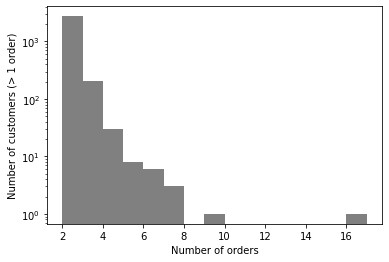

In [344]:
fig, ax = plt.subplots(1)
ax.hist(nb_orders.drop(index=nb_orders[nb_orders.values==1].index),
        color='grey', bins=15)
ax.set_yscale('log');
ax.set_xlabel('Number of orders');
ax.set_ylabel('Number of customers (> 1 order)');

In [345]:
dfs['orders'].isna().sum()

customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
order_id                    0
order_status                0
order_purchase_timestamp    0
shipping_time               0
shipping_delay              0
delivered                   0
price                       0
freight_value               0
order_item_nb               0
max_limit_ship_date         0
mean_prod_descr_length      0
review_score                0
review_comment_length       0
cum_paytype                 0
paytype_boleto              0
paytype_credit_card         0
paytype_debit_card          0
paytype_not_defined         0
paytype_voucher             0
payment_installments        0
payment_value               0
main_prod_categ             0
cat_office                  0
cat_unknown                 0
cat_fashion                 0
cat_furniture               0
cat_hygiene                 0
cat_home                    0
cat_leisure                 0
cat_diy   

### 0.4 Exportation of the Orders dataset

Now we export the dataset of aggregated orders in a .csv file.

In [348]:
dfs['orders'].to_csv('agg_orders.csv')